<a href="https://colab.research.google.com/github/btcnhung1299/tf-practice/blob/master/TF_Digit_Alpha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# Data Preparation

## Load dataset

In [2]:
ds, ds_info = tfds.load("binary_alpha_digits", split="train",
                        as_supervised=True, shuffle_files=True,
                        with_info=True)
ds_info

tfds.core.DatasetInfo(
    name='binary_alpha_digits',
    version=1.0.0,
    description='Binary 20x16 digits of '0' through '9' and capital 'A' through 'Z'. 39 examples of each class.',
    homepage='https://cs.nyu.edu/~roweis/data/',
    features=FeaturesDict({
        'image': Image(shape=(20, 16, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=36),
    }),
    total_num_examples=1404,
    splits={
        'train': 1404,
    },
    supervised_keys=('image', 'label'),
    citation="""""",
    redistribution_info=,
)

**There is a huge bias in the current dataset, so shuffling needs to be done to prevent underfitting.**

In [3]:
test_size = 0.2

ds_size = ds_info.splits["train"].num_examples
ds = ds.shuffle(buffer_size=ds_size)
num_train_samples = int(ds_size * (1 - test_size))

ds_train = ds.take(num_train_samples)
ds_test = ds.skip(num_train_samples)

Pixel in range: 0 - 1
Label: 6


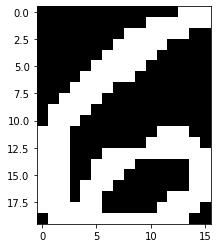

In [4]:
for sample in ds_train.take(1):
  X_sample, y_sample = map(lambda x : x.numpy(), sample)

print("Pixel in range:", X_sample.min(), '-', X_sample.max())
print("Label:", y_sample)
plt.imshow(X_sample.squeeze(), cmap="gray");

## Batchify dataset

In [5]:
num_classes = 10 + 26
input_shape = next(iter(ds_train))[0].shape
print("Input shape:", input_shape)

Input shape: (20, 16, 1)


In [6]:
BATCH_SIZE = 128
ds_train = ds_train.batch(BATCH_SIZE).shuffle(num_train_samples)
ds_test = ds_test.batch(BATCH_SIZE).shuffle(ds_size - num_train_samples)

print(ds_train, ds_test, sep="\n")

<DatasetV1Adapter shapes: ((None, 20, 16, 1), (None,)), types: (tf.uint8, tf.int64)>
<DatasetV1Adapter shapes: ((None, 20, 16, 1), (None,)), types: (tf.uint8, tf.int64)>


# Model Architecture

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D

In [8]:
model = Sequential()

model.add(Flatten(input_shape=input_shape))
model.add(Dense(num_classes, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 320)               0         
_________________________________________________________________
dense (Dense)                (None, 36)                11556     
Total params: 11,556
Trainable params: 11,556
Non-trainable params: 0
_________________________________________________________________


# Training

In [9]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["acc"])
hist = model.fit(ds_train, epochs=100, validation_data=ds_test)

Epoch 1/100
9/9 [==============================] - 0s 37ms/step - loss: 3.6689 - acc: 0.0614 - val_loss: 3.3214 - val_acc: 0.1032
Epoch 2/100
9/9 [==============================] - 0s 27ms/step - loss: 3.1459 - acc: 0.1674 - val_loss: 2.9271 - val_acc: 0.2598
Epoch 3/100
9/9 [==============================] - 0s 25ms/step - loss: 2.8202 - acc: 0.3001 - val_loss: 2.6246 - val_acc: 0.3772
Epoch 4/100
9/9 [==============================] - 0s 28ms/step - loss: 2.5536 - acc: 0.3927 - val_loss: 2.3862 - val_acc: 0.4555
Epoch 5/100
9/9 [==============================] - 0s 24ms/step - loss: 2.2952 - acc: 0.5111 - val_loss: 2.1998 - val_acc: 0.4804
Epoch 6/100
9/9 [==============================] - 0s 26ms/step - loss: 2.1288 - acc: 0.5405 - val_loss: 1.9910 - val_acc: 0.5587
Epoch 7/100
9/9 [==============================] - 0s 27ms/step - loss: 1.9429 - acc: 0.5770 - val_loss: 1.8145 - val_acc: 0.6370
Epoch 8/100
9/9 [==============================] - 0s 27ms/step - loss: 1.7937 - acc: 0.61